<a href="https://colab.research.google.com/github/jvataidee/DataScienceR/blob/master/w7_Stanford_MovingBeyondLinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://logodownload.org/wp-content/uploads/2021/04/stanford-university-logo.png" width="200"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

# **MovingBeyondLinearity**

In [3]:
install.packages("ISLR2",lib='/usr/lib/R/library')
install.packages("MASS",lib='/usr/lib/R/library')
install.packages("e1071",lib='/usr/lib/R/library')
install.packages("class",lib='/usr/lib/R/library')
install.packages("leaps",lib='/usr/lib/R/library')
install.packages("glmnet",lib='/usr/lib/R/library')
install.packages("pls",lib='/usr/lib/R/library')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(ISLR2)
library(boot)
library(MASS)
library(leaps)
library(glmnet)
library(pls)

In [7]:
attach(Wage)

fit <- lm(wage ~ poly(age, 4), data = Wage)
coef(summary(fit))

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year




,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [8]:
fit2 <- lm(wage ~ poly(age, 4, raw = T), data = Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [9]:
fit2a <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4),
    data = Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

In [11]:
fit2b <- lm(wage ~ cbind(age, age^2, age^3, age^4), data = Wage)

In [12]:
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)

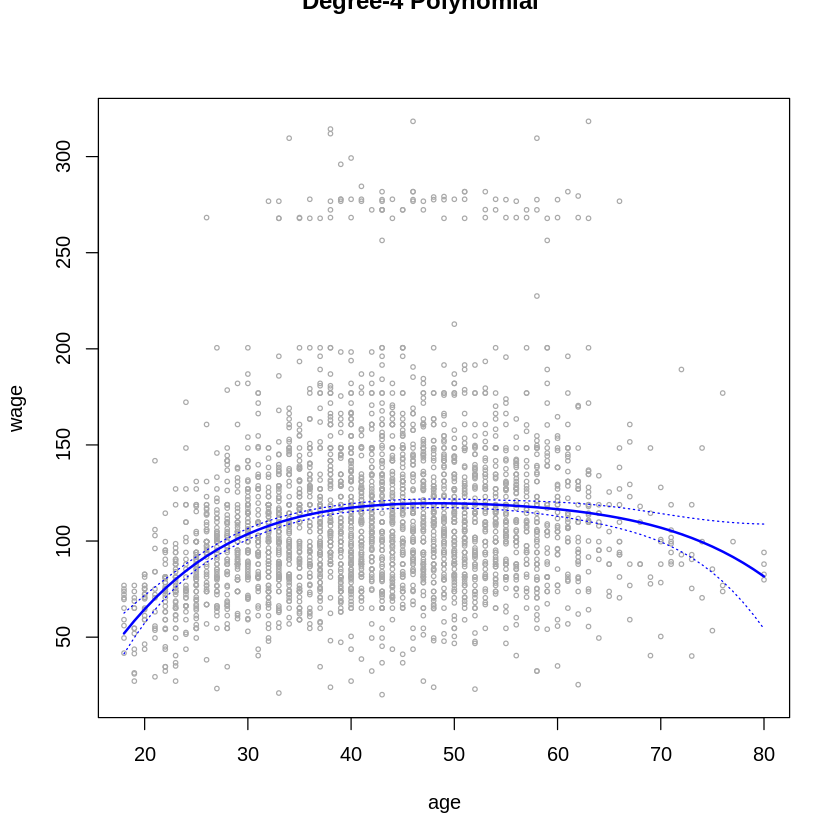

In [14]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Degree-4 Polynomial", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [15]:
preds2 <- predict(fit2, newdata = list(age = age.grid), se = TRUE)
max(abs(preds$fit - preds2$fit))

[1] 1.641354e-12

In [16]:
fit.1 <- lm(wage ~ age, data = Wage)
fit.2 <- lm(wage ~ poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ poly(age, 3), data = Wage)
fit.4 <- lm(wage ~ poly(age, 4), data = Wage)
fit.5 <- lm(wage ~ poly(age, 5), data = Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786.010,143.5931074,2.367734e-32
3,2996,4777674,1,15755.694,9.8887559,1.679213e-03
4,2995,4771604,1,6070.152,3.8098134,5.104623e-02
5,2994,4770322,1,1282.563,0.8049758,3.696820e-01


In [17]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


In [18]:
fit.1 <- lm(wage ~ education + age, data = Wage)
fit.2 <- lm(wage ~ education + poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ education + poly(age, 3), data = Wage)
anova(fit.1, fit.2, fit.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2994,3867992,NA,NA,NA,NA
2,2993,3725395,1,142597.10,114.696898,2.728971e-26
3,2992,3719809,1,5586.66,4.493588,3.410431e-02


In [19]:
fit <- glm(I(wage > 250) ~ poly(age, 4), data = Wage, family = binomial)

In [20]:
preds <- predict(fit, newdata = list(age = age.grid), se = T)

In [21]:
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))

In [22]:
preds <- predict(fit, newdata = list(age = age.grid), type = "response", se = T)

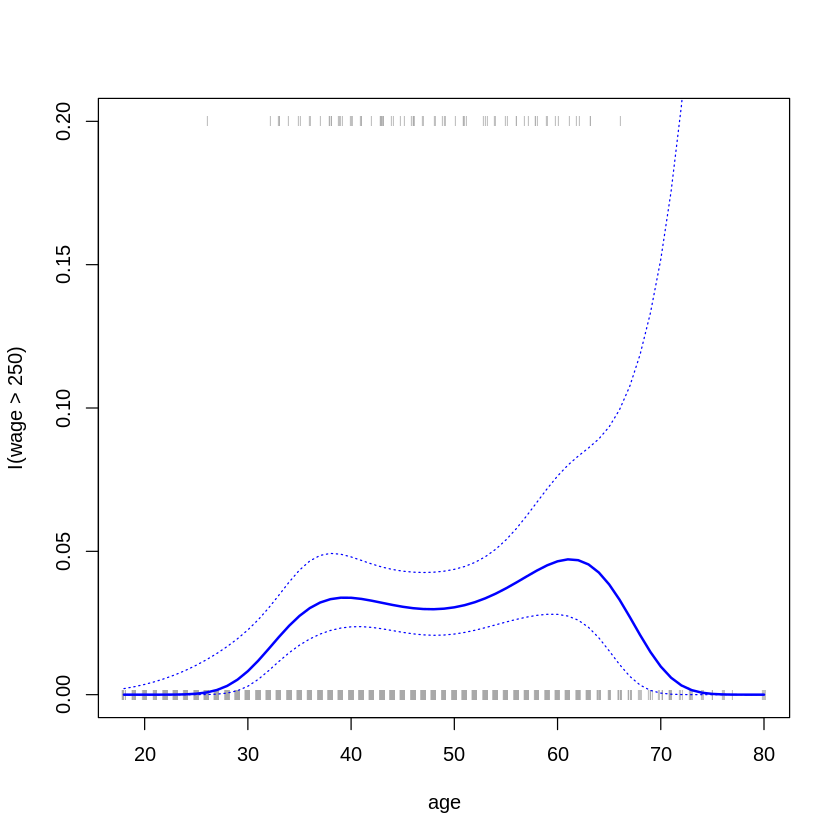

In [25]:
plot(age, I(wage > 250), xlim = agelims, type = "n", ylim = c(0, .2))
points(jitter(age), I((wage > 250) / 5), cex = .5, pch = "|", col = "darkgrey")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [26]:
table(cut(age, 4))
fit <- lm(wage ~ cut(age, 4), data = Wage)
coef(summary(fit))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


In [27]:
library(splines)

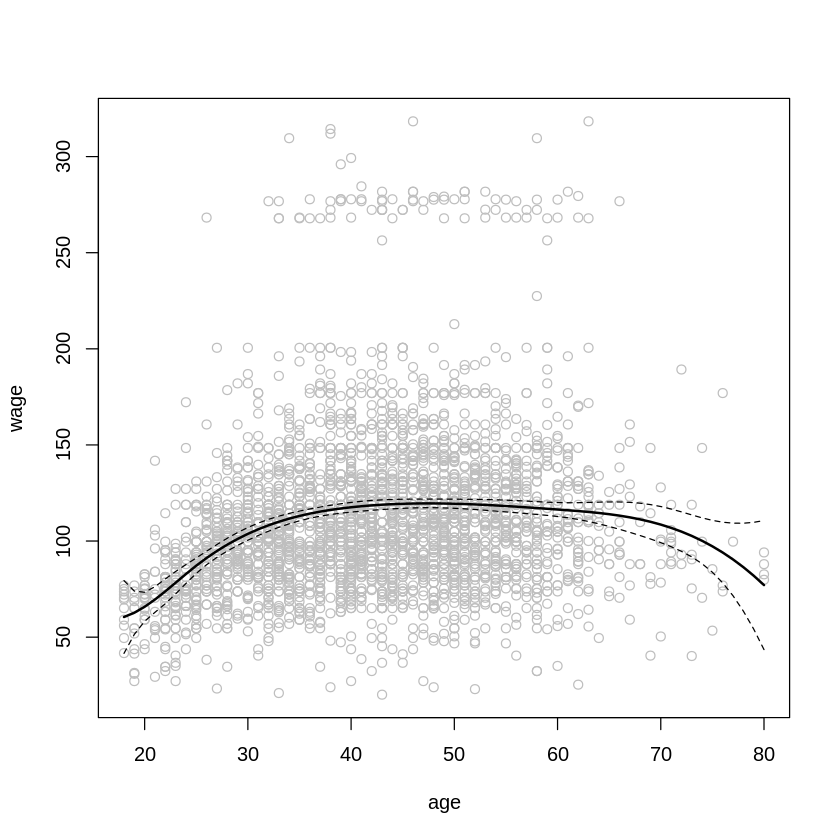

In [28]:
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
pred <- predict(fit, newdata = list(age = age.grid), se = T)
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2 * pred$se, lty = "dashed")

In [29]:
dim(bs(age, knots = c(25, 40, 60)))
dim(bs(age, df = 6))
attr(bs(age, df = 6), "knots")

[1] 3000    6

[1] 3000    6

25%   50%   75% 
33.75 42.00 51.00

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”


[1] 6.794596

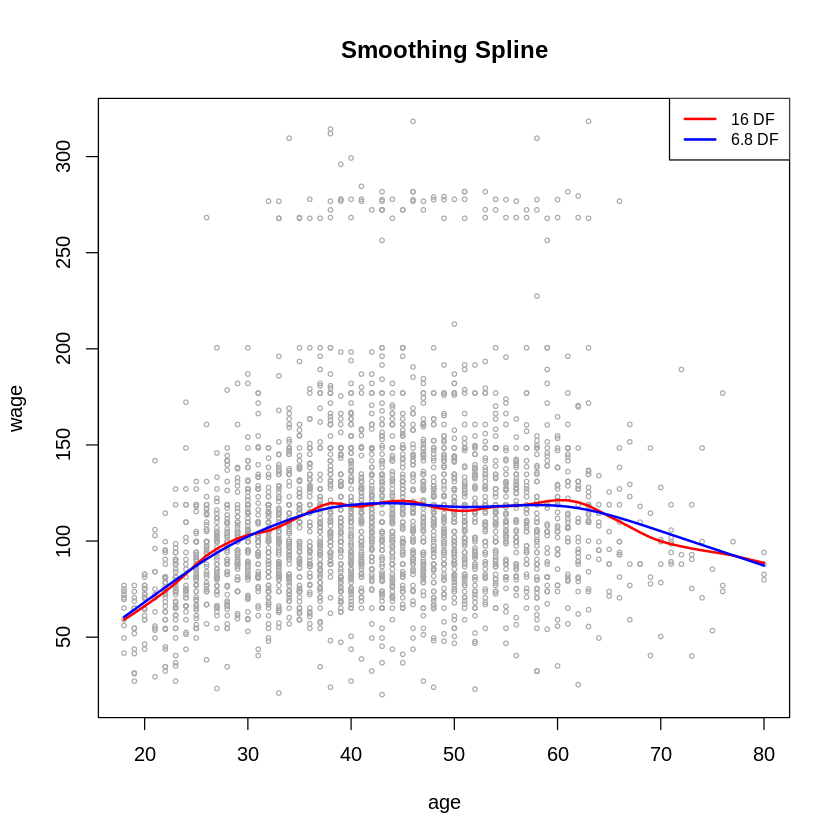

In [32]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Smoothing Spline")
fit <- smooth.spline(age, wage, df = 16)
fit2 <- smooth.spline(age, wage, cv = TRUE)
fit2$df
lines(fit, col = "red", lwd = 2)
lines(fit2, col = "blue", lwd = 2)
legend("topright", legend = c("16 DF", "6.8 DF"),
    col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)

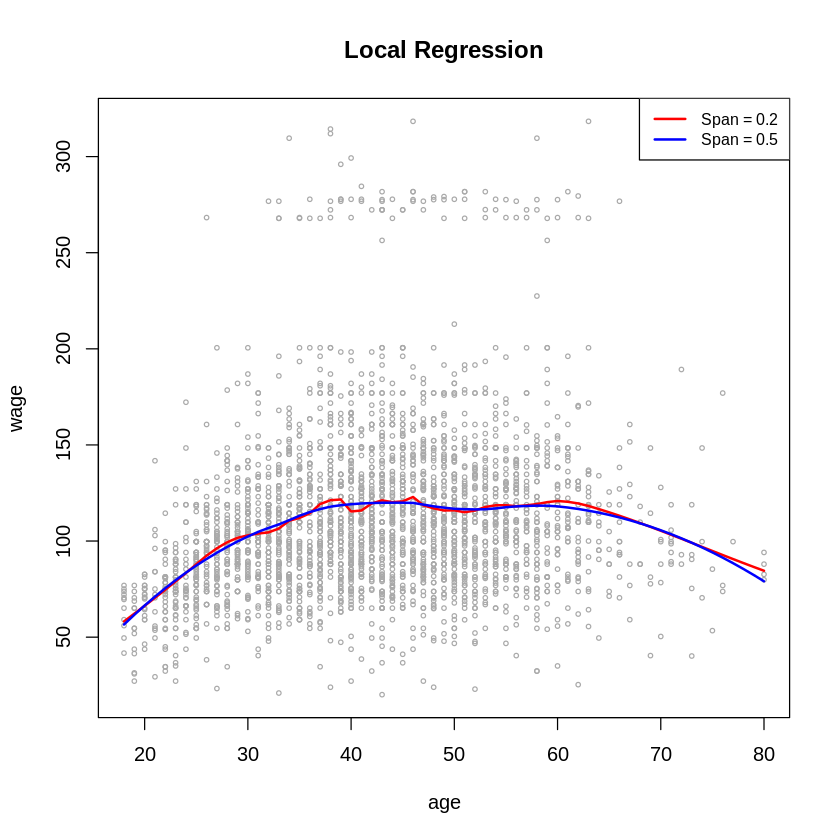

In [33]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Local Regression")
fit <- loess(wage ~ age, span = .2, data = Wage)
fit2 <- loess(wage ~ age, span = .5, data = Wage)
lines(age.grid, predict(fit, data.frame(age = age.grid)),
    col = "red", lwd = 2)
lines(age.grid, predict(fit2, data.frame(age = age.grid)),
    col = "blue", lwd = 2)
legend("topright", legend = c("Span = 0.2", "Span = 0.5"),
    col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)

## GAMs


In [38]:
install.packages("gam",lib='/usr/lib/R/library')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [39]:
library(gam)

Loading required package: foreach

Loaded gam 1.20.1




In [34]:
gam1 <- lm(wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

In [40]:
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education, data = Wage)

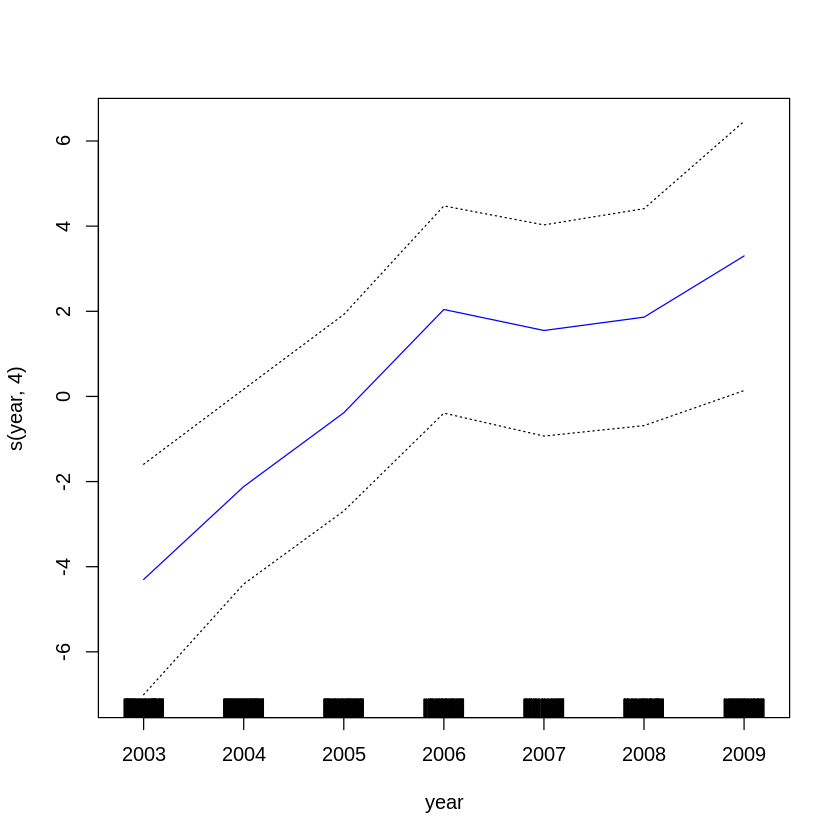

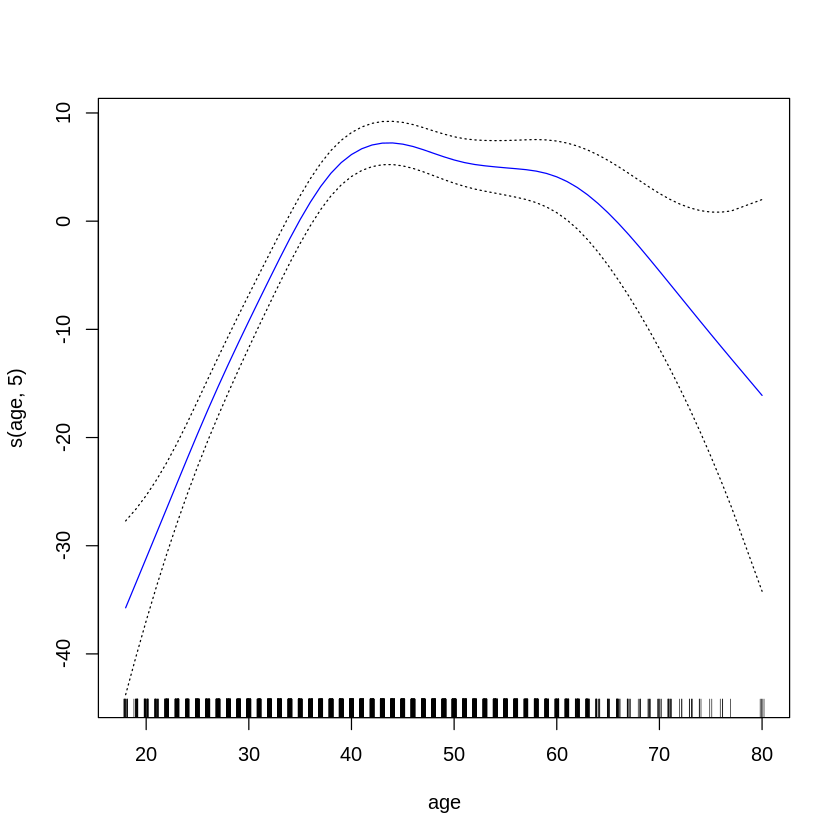

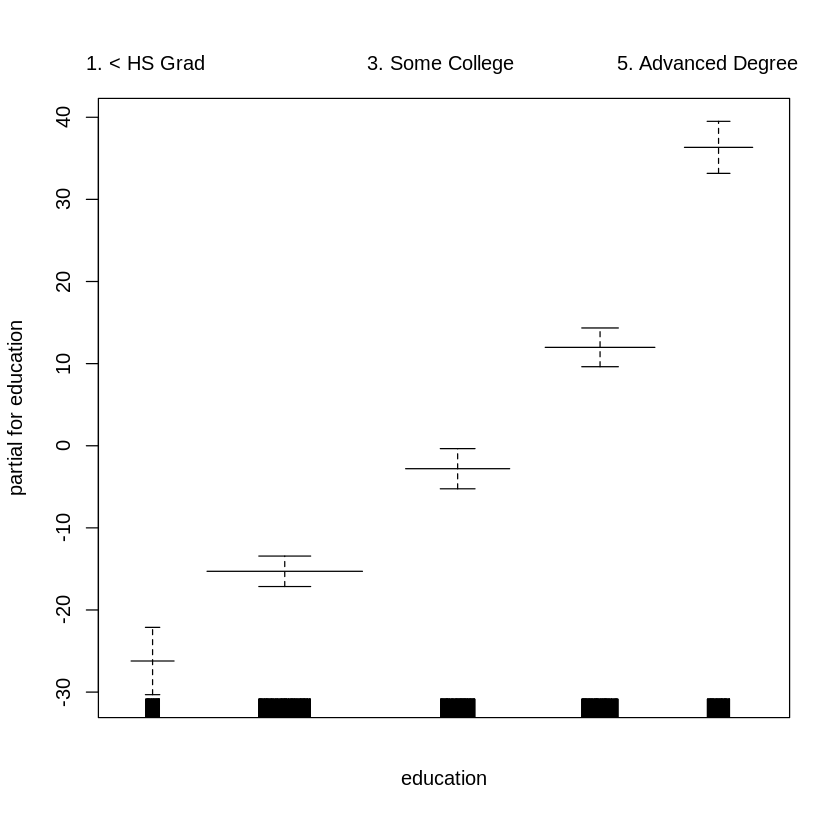

In [42]:
plot(gam.m3, se = TRUE, col = "blue")

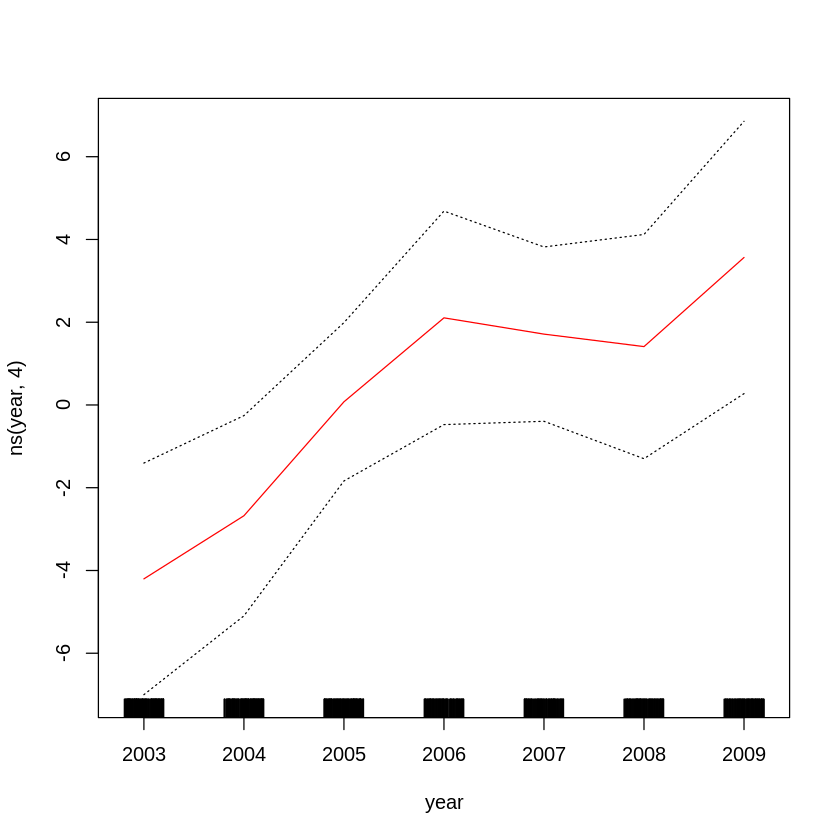

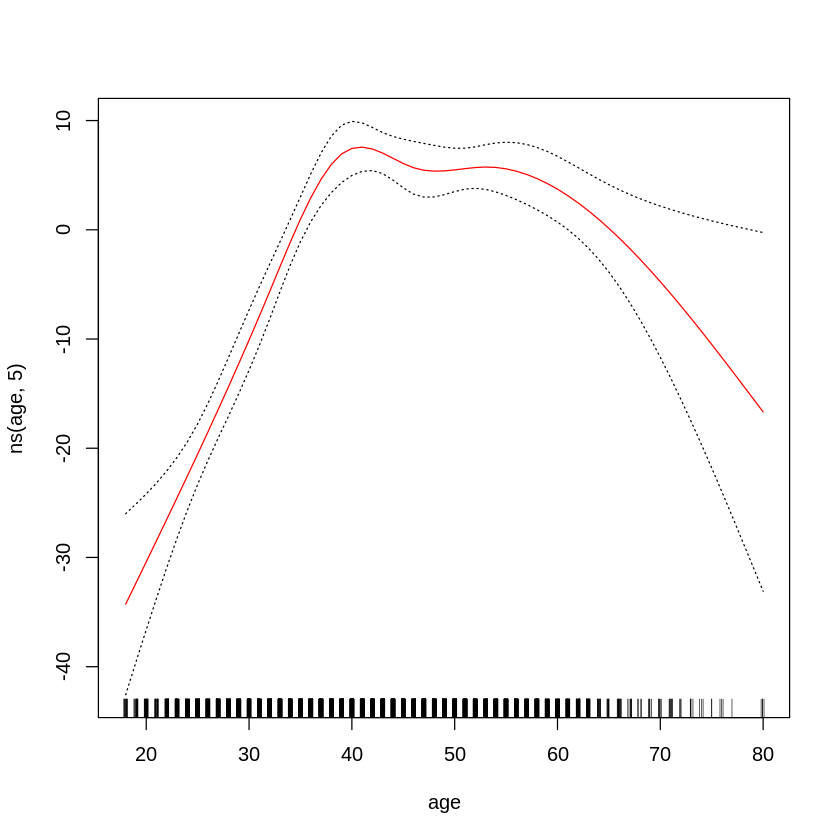

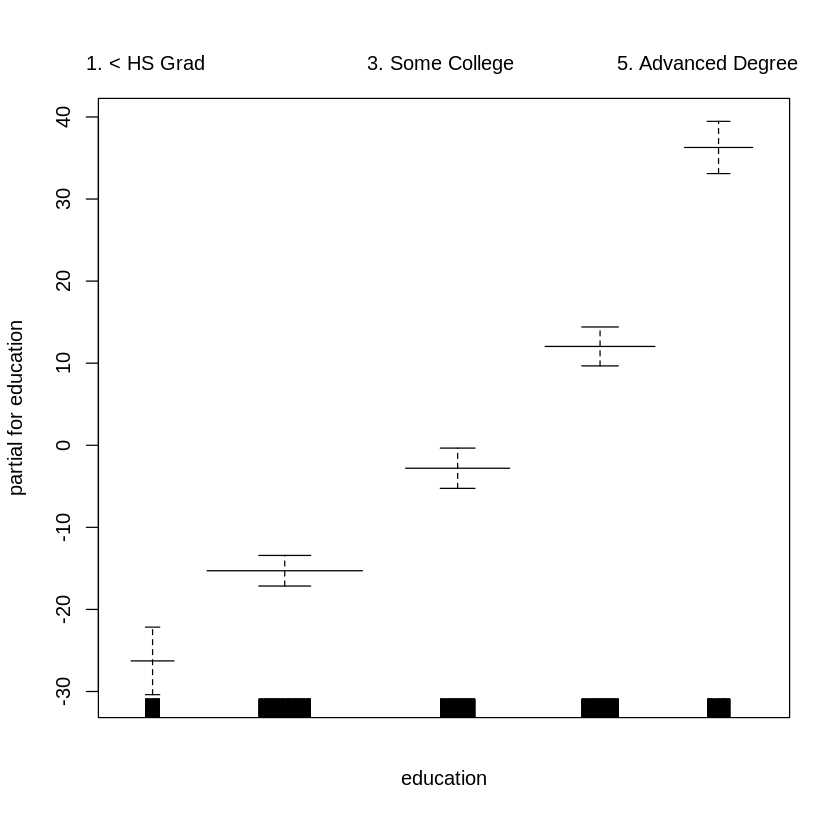

In [43]:
plot.Gam(gam1, se = TRUE, col = "red")

In [44]:
gam.m1 <- gam(wage ~ s(age, 5) + education, data = Wage)
gam.m2 <- gam(wage ~ year + s(age, 5) + education, data = Wage)
anova(gam.m1, gam.m2, gam.m3, test = "F")

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2990,3711731,NA,NA,NA,NA
2,2989,3693842,1.000000,17889.243,14.477130,0.0001447167
3,2986,3689770,2.999989,4071.134,1.098212,0.3485661430


In [45]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
--

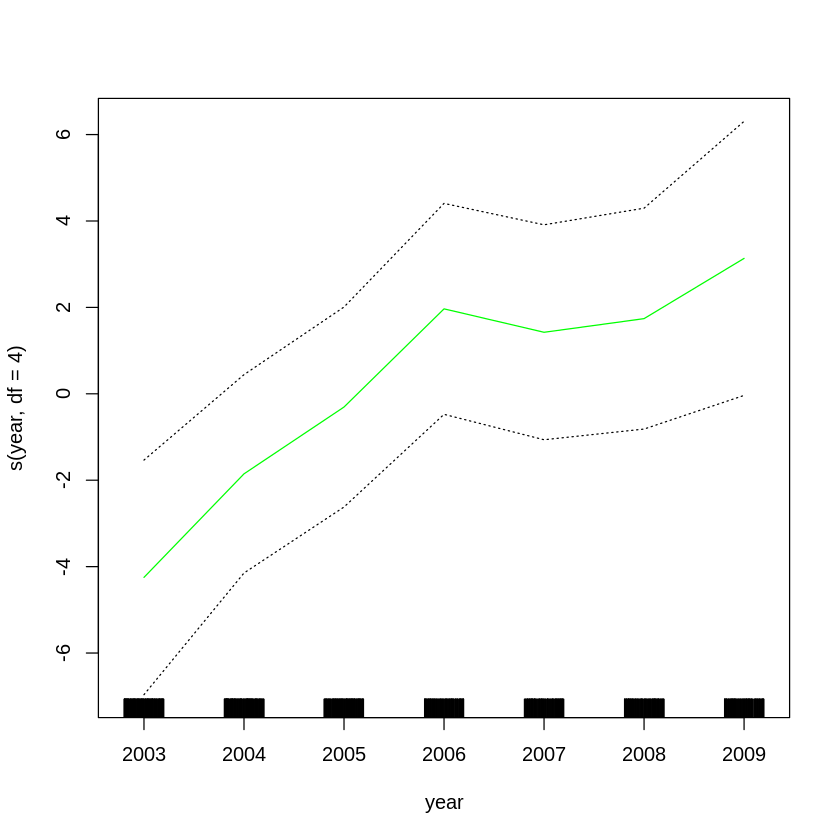

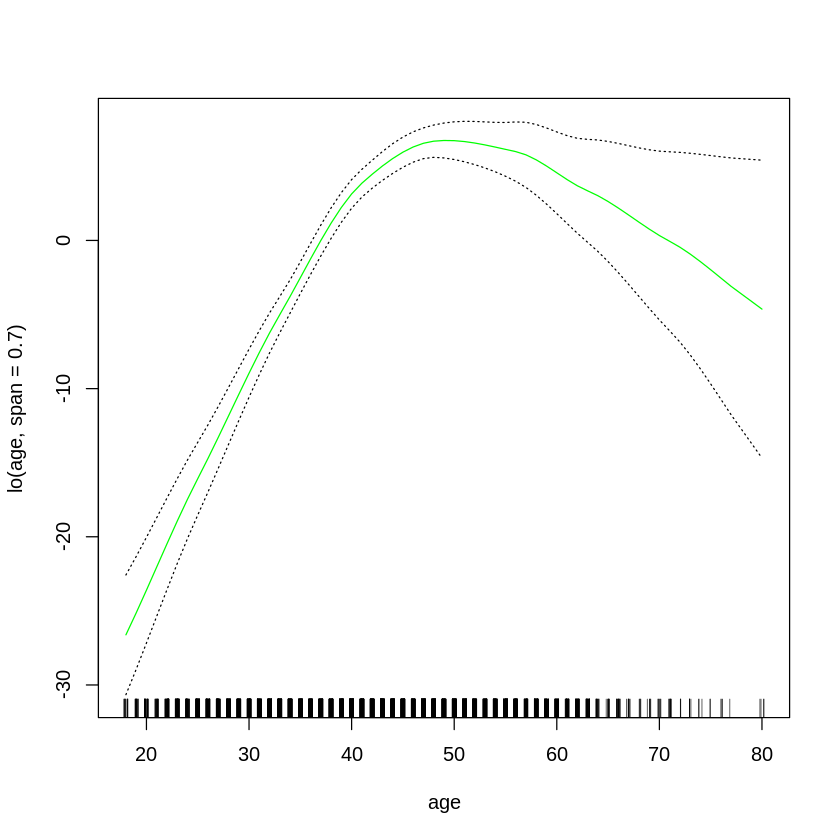

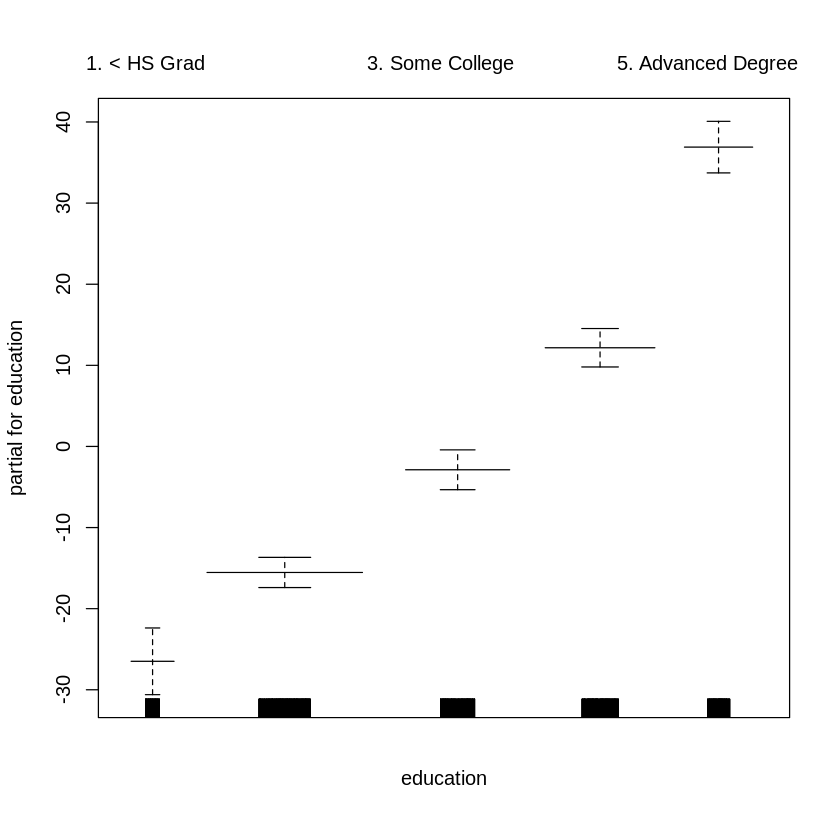

In [46]:
preds <- predict(gam.m2, newdata = Wage)

gam.lo <- gam(
    wage ~ s(year, df = 4) + lo(age, span = 0.7) + education,
    data = Wage
  )
plot(gam.lo, se = TRUE, col = "green")

In [48]:
gam.lo.i <- gam(wage ~ lo(year, age, span = 0.5) + education,  data = Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”


In [51]:
install.packages("akima",lib='/usr/lib/R/library')

also installing the dependency ‘sp’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [52]:
library(akima)

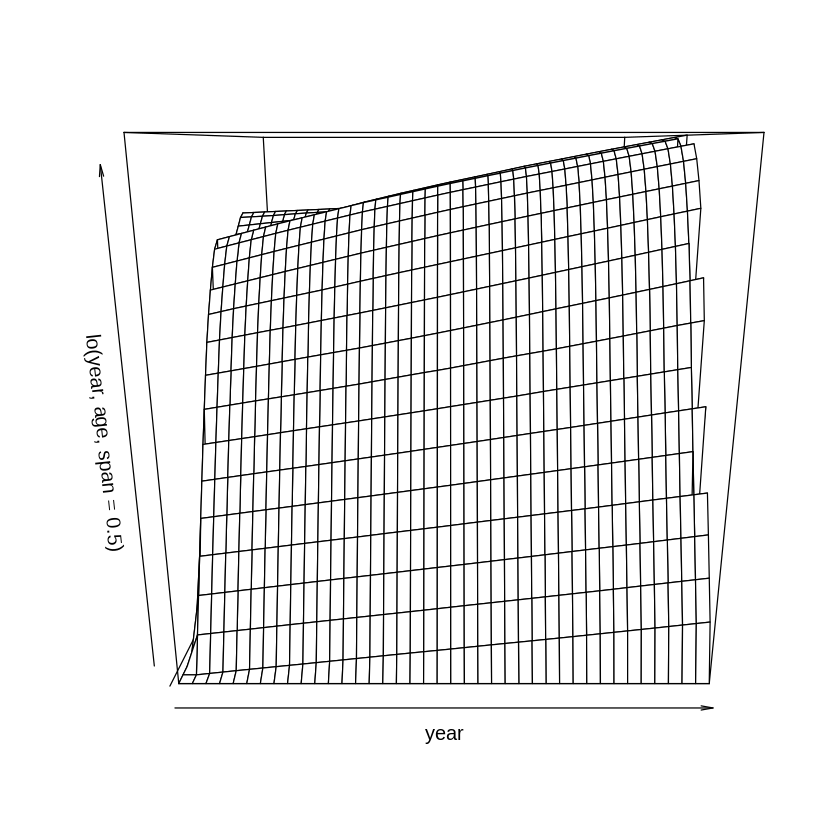

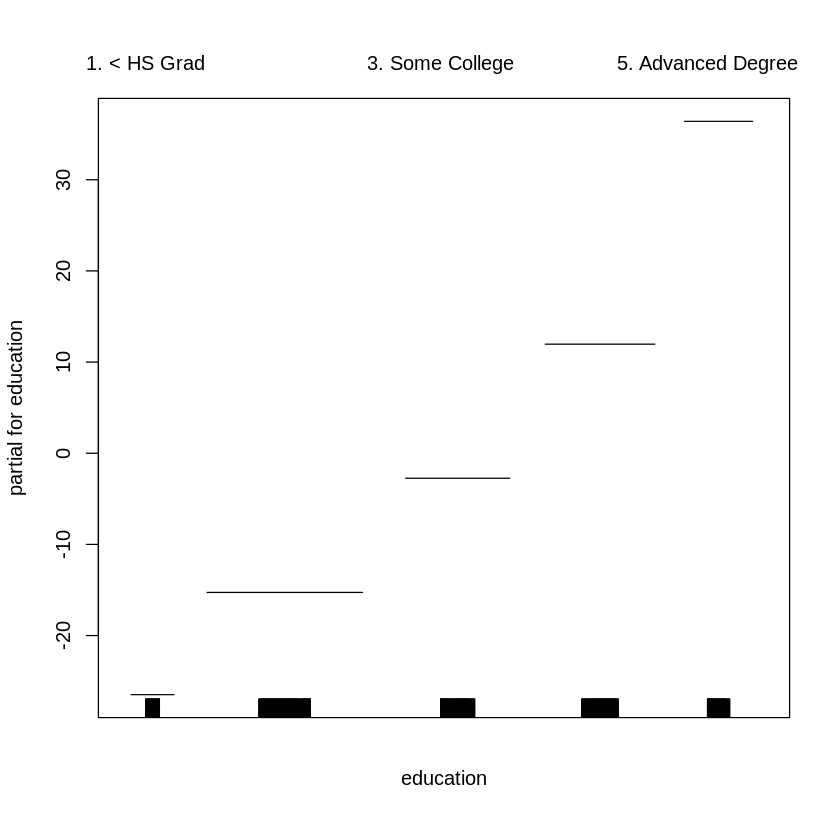

In [53]:
plot(gam.lo.i)

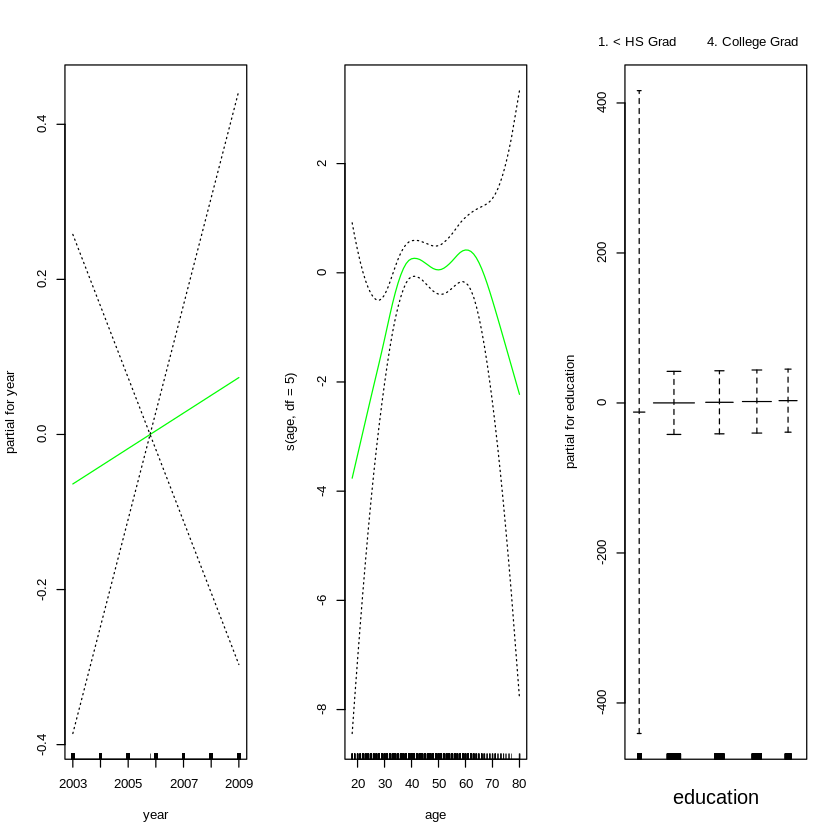

In [54]:
gam.lr <- gam(
    I(wage > 250) ~ year + s(age, df = 5) + education,
    family = binomial, data = Wage
  )
par(mfrow = c(1, 3))
plot(gam.lr, se = T, col = "green")

In [55]:
table(education, I(wage > 250))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

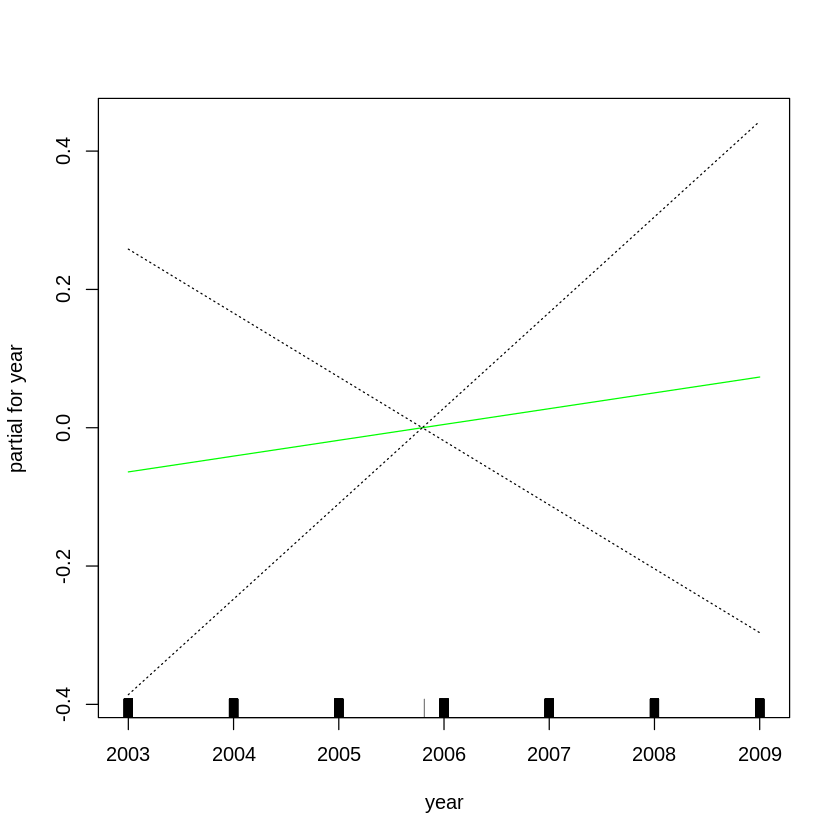

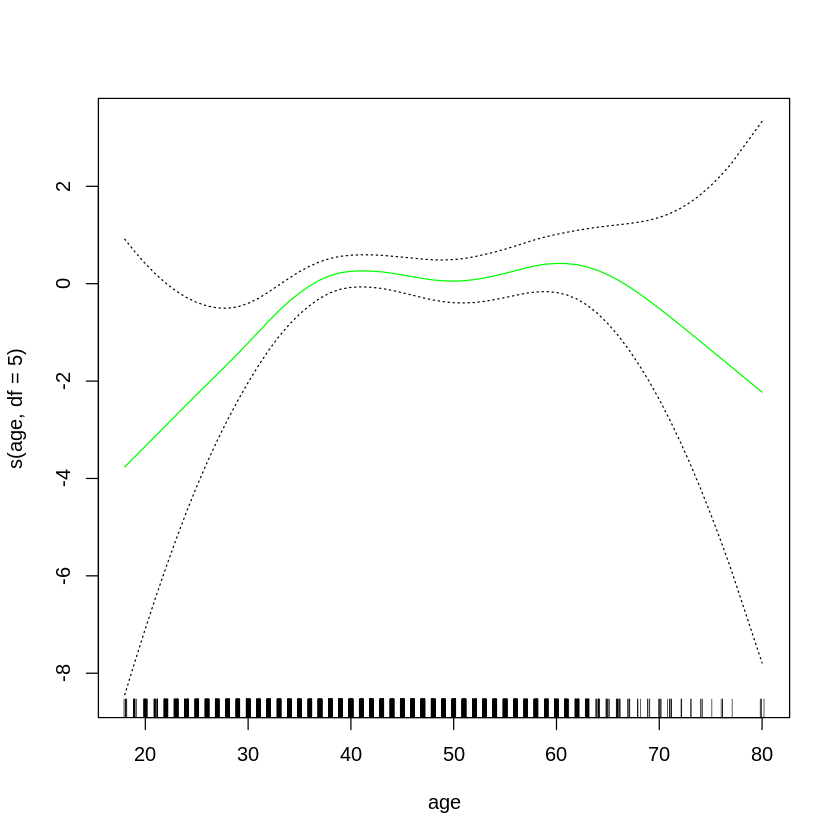

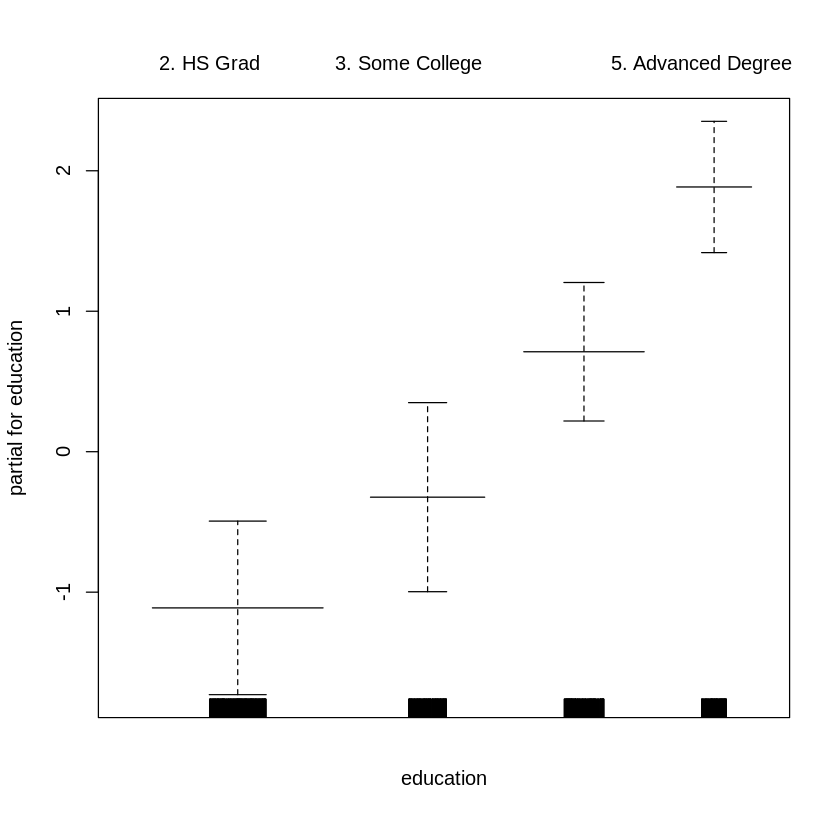

In [56]:
gam.lr.s <- gam(
    I(wage > 250) ~ year + s(age, df = 5) + education,
    family = binomial, data = Wage,
    subset = (education != "1. < HS Grad")
  )
plot(gam.lr.s, se = T, col = "green")